In [0]:
# 패키지 임포트
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 세트 준비
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
# 데이터 세트의 셰이프 확인
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
# 데이터 세트 데이터 확인
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
# 데이터 세트 라벨 확인
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [0]:
# 데이터 세트 전처리(셔플)
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# 데이터 세트 전처리(정규화)
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [8]:
# 데이터 세트 전처리 후 데이터 확인
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.280996,-0.483615,-0.435762,-0.256833,-0.165227,-0.798526,0.931316,0.023144,-0.626249,-0.595170,1.148500,0.042416,0.774154
1,0.051714,-0.483615,1.028326,3.893584,1.815177,-0.654642,0.716309,-0.905247,1.675886,1.565287,0.784476,-0.018545,0.262117
2,-0.395922,-0.483615,-1.270703,-0.256833,-0.592038,1.252514,0.830979,-0.512734,-0.741356,-1.281221,-0.307596,0.418501,-1.093196
3,-0.404804,3.307730,-1.195735,-0.256833,-1.343225,1.158003,-1.727605,1.759150,-0.971569,-0.727566,-1.445171,0.424884,-0.675009
4,-0.405101,0.274654,-1.292753,-0.256833,-0.165227,0.434355,-0.136553,0.172476,-0.971569,-0.661368,-1.445171,0.448077,-1.071113


In [0]:
# 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [0]:
# 컴파일
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

In [0]:
# EarlyStopping 준비
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [13]:
# 학습
history = model.fit(train_data, train_labels, epochs=500, 
    validation_split=0.2, callbacks=[early_stop])

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 589us/sample - loss: 531.2626 - mean_absolute_error: 21.3498 - val_loss: 598.8288 - val_mean_absolute_error: 22.1693
Epoch 2/500
323/323 [==============================] - 0s 81us/sample - loss: 474.2414 - mean_absolute_error: 19.9830 - val_loss: 526.0160 - val_mean_absolute_error: 20.5233
Epoch 3/500
323/323 [==============================] - 0s 115us/sample - loss: 410.9063 - mean_absolute_error: 18.3520 - val_loss: 440.9447 - val_mean_absolute_error: 18.4470
Epoch 4/500
323/323 [==============================] - 0s 83us/sample - loss: 336.3419 - mean_absolute_error: 16.2175 - val_loss: 345.4991 - val_mean_absolute_error: 15.9891
Epoch 5/500
323/323 [==============================] - 0s 76us/sample - loss: 253.4066 - mean_absolute_error: 13.5381 - val_loss: 247.7915 - val_mean_absolute_error: 13.0538
Epoch 6/500
323/323 [==============================] - 0s 78us/sample - loss: 175.8

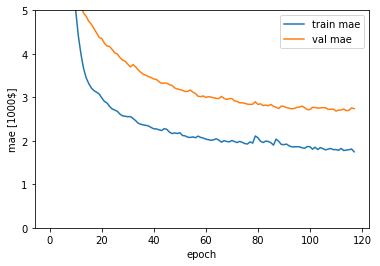

In [14]:
# 그래프 표시
plt.plot(history.history['mean_absolute_error'], label='train mae')
plt.plot(history.history['val_mean_absolute_error'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [15]:
# 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

102/102 [==============================] - 0s 107us/sample - loss: 20.1346 - mean_absolute_error: 2.9615
loss:20.135
mae: 2.961


In [16]:
# 추론할 가격 표시
print(np.round(test_labels[0:10]))

# 추론한 가격 표시
test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 9. 18. 21. 30. 26. 17. 26. 22. 19. 22.]
